In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import datetime as dt

### Parsing raw data - all India - Urban and Rural

In [ ]:
# colspecs2 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(39,40),(40,41),(41,44),(44,45),(45,47),(47,49),(49,51),(126,129),(129,139)]
# dfTUS2 = pd.read_fwf('TUS106_L02.txt', colspecs2)
# columns2 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","RelationToHead","Gender","Age","MaritalStatus","Education", "PrincipleActivity","Industry of work","NSC", "Multiplier"]
# dfTUS2.columns =  columns2

# colspecs4 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(44,45),(45,46),(46,47),(126,129),(129,139)]
# dfTUS4 = pd.read_fwf('TUS106_L04.txt', colspecs4)
# columns4 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "PersonID", "Day of the week", "Type of the day","Response code","NSC", "Multiplier"]
# dfTUS4.columns =  columns4

# colspecs5 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(42,45),(45,50),(50,55),(55,56),(56,57),(57,58), (58,59), (58,60), (58,61),(61,62),(62,64),(64,65),(126,129),(129,139)]
# dfTUS5 = pd.read_fwf('TUS106_L05.txt', colspecs5)                                                                                                               
# columns5 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","Serial no of activity", "Time from","Time to","MultiActivity","SimulActivity", "MajorActivity","Activity category", "Activity group","Activity code", "Where","Paid-unpaid","Type of enterprise","NSC", "Multiplier"]
# dfTUS5.columns =  columns5

#### Filtering only rural India data and choosing the state of Maharashtra NSS code 27 

In [ ]:
# dfTUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 27)]
# dfTUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 27)]
# dfTUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 27)]

# dfTUS2.to_csv('MHTUS2.csv')
# dfTUS4.to_csv('MHTUS4.csv')
# dfTUS5.to_csv('MHTUS5.csv')

#### Reading Maharashtra (rural) data

In [12]:
dfTUS2 = pd.read_csv('MHTUS2T.csv')
dfTUS4 = pd.read_csv('MHTUS4T.csv')
dfTUS5 = pd.read_csv('MHTUS5T.csv')

In [3]:
dfTUS5.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'FSU', 'Sector', 'State', 'District',
       'Stratum', 'Sub-stratum', 'Sample HHID', 'PersonID',
       'Serial no of activity', 'Time from', 'Time to', 'MultiActivity',
       'SimulActivity', 'MajorActivity', 'Activity category', 'Activity group',
       'Activity code', 'Where', 'Paid-unpaid', 'Type of enterprise', 'NSC',
       'Multiplier'],
      dtype='object')

#### Assigning individual unique id

In [123]:


dfTUS2['id'] = dfTUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS2 = dfTUS2.set_index('id')

dfTUS4['id'] = dfTUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS4 = dfTUS4.set_index('id')

dfTUS5['id'] = dfTUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS5 = dfTUS5.set_index('id')

#### Merging demographic data 

In [130]:
## Demographic details analysis

# TUS_merged = pd.merge(dfTUS2, dfTUS4, on = 'id')
TUS_merged = dfTUS2.merge(dfTUS4, on="id")
#TUS_merged.isna().sum()
#TUS_merged.shape

#### Merging individual ids to their activity records

In [131]:
TUS_full = pd.merge(dfTUS5, TUS_merged, left_index=True, right_index = True)
TUS_full.index.nunique()


4190

In [140]:
TUS_full.loc[TUS_full.index == 1, ["Time from", "Time to"]]

,Time from,Time to
id,,
1,04:00,06:00
1,06:00,07:00
1,06:00,07:00
1,07:00,07:30
1,07:30,08:00
1,08:00,09:00
1,09:00,10:00
1,10:00,10:30
1,10:30,11:00


#### Dropping rest of the columns not relevant to Time Use

In [132]:
col = ['FSU', 'Sector', 'State', 'District', 'Stratum',
       'Sub-stratum', 'Sample HHID', 'PersonID',
       'Paid-unpaid', 'Type of enterprise', 'NSC', 'Multiplier',
       'Unnamed: 0_x', 'FSU_x', 'Sector_x', 'State_x', 'District_x',
       'Stratum_x', 'Sub-stratum_x', 'Sample HHID_x', 'PersonID_x',
       'RelationToHead', 'Gender', 'Age', 'MaritalStatus', 'Education',
       'PrincipleActivity', 'Industry of work', 'NSC_x', 'Multiplier_x',
       'Unnamed: 0_y', 'FSU_y', 'Sector_y', 'State_y', 'District_y',
       'Stratum_y', 'Sub-stratum_y', 'Sample HHID_y', 'PersonID_y',
       'Day of the week', 'Type of the day', 'Response code', 'NSC_y',
       'Multiplier_y','Unnamed: 0']
    
TUS_MH = TUS_full.drop(columns = col, axis=1)
TUS_MH = TUS_MH.reset_index()
#del(TUS_full)

#### Converting time from and time to in datetime 

Rather than convert to times, I convert to dates and then make the dates unique by adding the `id` as a `timedelta`
object representing the number of days. This is required because when we `resample()` later the index _must_ be unique.

In [134]:
TUS_MH["Start_time"] = pd.to_datetime(TUS_MH['Time from'], format="%H:%M")#.dt.time
TUS_MH["End_time"] = pd.to_datetime(TUS_MH['Time to'], format="%H:%M")#.dt.time
TUS_MH["Unique_time"] = TUS_MH["Start_time"] + (pd.to_timedelta(TUS_MH["id"], unit="D"))
TUS_MH.loc[TUS_MH["id"] == 0]
#TUS_MH[["id", "Start_time", "End_time", "Unique_time"]]
#TUS_MH.set_index(["Unique_time"], inplace=True)

,id,Unnamed: 0.1,Serial no of activity,Time from,Time to,MultiActivity,SimulActivity,MajorActivity,Activity category,Activity group,Activity code,Where,Start_time,End_time,Unique_time
0,0,0,1,04:00,07:00,2.0,NaN,1,9,91,911,1,1900-01-01 04:00:00,1900-01-01 07:00:00,1900-01-01 04:00:00
1,0,1,2,07:00,08:00,2.0,NaN,1,8,83,832,2,1900-01-01 07:00:00,1900-01-01 08:00:00,1900-01-01 07:00:00
2,0,2,3,08:00,08:30,2.0,NaN,1,9,93,931,1,1900-01-01 08:00:00,1900-01-01 08:30:00,1900-01-01 08:00:00
3,0,3,4,08:30,09:30,2.0,NaN,1,9,92,921,1,1900-01-01 08:30:00,1900-01-01 09:30:00,1900-01-01 08:30:00
4,0,4,5,09:30,10:30,2.0,NaN,1,1,18,182,2,1900-01-01 09:30:00,1900-01-01 10:30:00,1900-01-01 09:30:00
5,0,5,6,10:30,16:00,2.0,NaN,1,1,12,128,2,1900-01-01 10:30:00,1900-01-01 16:00:00,1900-01-01 10:30:00
6,0,6,7,16:00,16:30,2.0,NaN,1,9,92,921,2,1900-01-01 16:00:00,1900-01-01 16:30:00,1900-01-01 16:00:00
7,0,7,8,16:30,17:30,2.0,NaN,1,1,12,128,2,1900-01-01 16:30:00,1900-01-01 17:30:00,1900-01-01 16:30:00
8,0,8,9,17:30,18:30,2.0,NaN,1,1,18,182,2,1900-01-01 17:30:00,1900-01-01 18:30:00,1900-01-01 17:30:00
9,0,9,10,18:30,19:00,2.0,NaN,1,9,93,931,1,1900-01-01 18:30:00,1900-01-01 19:00:00,1900-01-01 18:30:00


In [128]:
TUS_MH[["id", "Start_time"]]

,id,Start_time
Unique_time,,
1900-01-01 04:00:00,0,1900-01-01 04:00:00
1900-01-01 07:00:00,0,1900-01-01 07:00:00
1900-01-01 08:00:00,0,1900-01-01 08:00:00
1900-01-01 08:30:00,0,1900-01-01 08:30:00
1900-01-01 09:30:00,0,1900-01-01 09:30:00
...,...,...
1911-06-22 08:00:00,4189,1900-01-01 08:00:00
1911-06-22 10:00:00,4189,1900-01-01 10:00:00
1911-06-22 12:00:00,4189,1900-01-01 12:00:00


### Timestamp shifting
- original data is entered in 4:00am to 4:00am format
- date time module calculates midnight to midnight 
- The issue was in calculating the entries which has sleeping activity from time 22:00 to 4:00 because of change of date
- the code below calculates the shift of time and fits all in 24 hour format 
- Other things tried are - pd.shift(), pd.tshift() and timedelta (none worked in hourly format that could potentially avoid negative time difference)

### Testing - Single person (`id == 0`)

We test on a single person first, reset the index and then set a single index of "Start_time"

In [129]:
# Subset out instances where index level 0 (i.e. "id") is 0
TUS_MH_single = TUS_MH.loc[TUS_MH["id"] == 0]
TUS_MH_single

,id,Unnamed: 0.1,Serial no of activity,Time from,Time to,MultiActivity,SimulActivity,MajorActivity,Activity category,Activity group,Activity code,Where,Start_time,End_time
Unique_time,,,,,,,,,,,,,,
1900-01-01 04:00:00,0,0,1,04:00,07:00,2.0,NaN,1,9,91,911,1,1900-01-01 04:00:00,1900-01-01 07:00:00
1900-01-01 07:00:00,0,1,2,07:00,08:00,2.0,NaN,1,8,83,832,2,1900-01-01 07:00:00,1900-01-01 08:00:00
1900-01-01 08:00:00,0,2,3,08:00,08:30,2.0,NaN,1,9,93,931,1,1900-01-01 08:00:00,1900-01-01 08:30:00
1900-01-01 08:30:00,0,3,4,08:30,09:30,2.0,NaN,1,9,92,921,1,1900-01-01 08:30:00,1900-01-01 09:30:00
1900-01-01 09:30:00,0,4,5,09:30,10:30,2.0,NaN,1,1,18,182,2,1900-01-01 09:30:00,1900-01-01 10:30:00
1900-01-01 10:30:00,0,5,6,10:30,16:00,2.0,NaN,1,1,12,128,2,1900-01-01 10:30:00,1900-01-01 16:00:00
1900-01-01 16:00:00,0,6,7,16:00,16:30,2.0,NaN,1,9,92,921,2,1900-01-01 16:00:00,1900-01-01 16:30:00
1900-01-01 16:30:00,0,7,8,16:30,17:30,2.0,NaN,1,1,12,128,2,1900-01-01 16:30:00,1900-01-01 17:30:00
1900-01-01 17:30:00,0,8,9,17:30,18:30,2.0,NaN,1,1,18,182,2,1900-01-01 17:30:00,1900-01-01 18:30:00


Expand the dataset into half-hour sections using `.ffill()` to "forward fill"

In [122]:
TUS_MH_single.resample(rule="0.5H").ffill()

ValueError: cannot reindex a non-unique index with a method or limit

This looks promising but we have a problem, it only goes to `22:00:00` and we are missing the last few hours (in this
case six hours).

In [12]:
TUS_MH_new = pd.DataFrame(columns = TUS_MH.columns )
#for i in range(TUS_MH.index.nunique()): ## considering this will take too long run time
for i in range(3000):           ## so for trial taking 30000 entries ~ 2100 person ids
    if TUS_MH['Time to'].iloc[i] == "04:00":   ## if end time is 4:00 entries 
        temp_df = TUS_MH[i:i+1].copy()
        if not(TUS_MH['Time from'].iloc[i] == "00:00"):
            start_mn = TUS_MH['Start_time'].iloc[i].minute
            start_hr = TUS_MH['Start_time'].iloc[i].hour
            hr_diff = 24-start_hr
            n_half_hr = 2*hr_diff
            if start_mn == 30:
                n_half_hr = n_half_hr - 1
            if n_half_hr > 1:
                start_time0 = temp_df['Start_time'].iloc[0]
                for j in range(n_half_hr):
                    temp_df['Start_time'] = (dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*j)).time()
                    temp_df['End_time'] =(dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*(j+1))).time()
                    TUS_MH_new = pd.concat([TUS_MH_new,temp_df])
        n_half_hr = 8
        
        start_time0 = pd.to_datetime('00:00', format="%H:%M").time()
        for j in range(n_half_hr):
            temp_df['Start_time'] = (dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*j)).time()
            temp_df['End_time'] =(dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*(j+1))).time()
            TUS_MH_new = pd.concat([TUS_MH_new,temp_df])
    #################################################        
                
    else:    
        end_mn = TUS_MH['End_time'].iloc[i].minute
        end_hr = TUS_MH['End_time'].iloc[i].hour
        start_mn = TUS_MH['Start_time'].iloc[i].minute
        start_hr = TUS_MH['Start_time'].iloc[i].hour
        hr_diff = end_hr-start_hr
        min_diff = end_mn-start_mn
        if min_diff == -30:
            hr_diff = hr_diff - 1
            min_diff = 30
        n_half_hr = 2*hr_diff
        if min_diff == 30:
            n_half_hr = n_half_hr + 1
        if n_half_hr > 1:
            temp_df = TUS_MH[i:i+1].copy()
            start_time0 = temp_df['Start_time'].iloc[0]
            for j in range(n_half_hr):
                temp_df['Start_time'] = (dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*j)).time()
                temp_df['End_time'] =(dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*(j+1))).time()
                TUS_MH_new = pd.concat([TUS_MH_new,temp_df])

###############################################
TUS_MH_new = TUS_MH_new.reset_index()

In [19]:
times = TUS_MH_new['Start_time'].unique()
times = np.sort(times)
prob_df = pd.DataFrame(index = times,columns = np.arange(1,11,1))
for time in times:
    dd1 = TUS_MH_new[TUS_MH_new['Start_time']==time]
    tot = dd1.shape[0]
    for gr in np.arange(1,11,1):
        prob_df[gr].loc[time] = dd1[dd1['Activity group']==gr].shape[0]/tot

prob_df.plot(kind = 'area', figsize=(4,4));
plt.xticks([dt.time(hour=i) for i in np.arange(0,24,4)])
plt.show(); 

<IPython.core.display.Javascript object>

In [20]:
occ = TUS_MH_new
occ.loc[:,('group')] = occ.loc[:,('Activity group')]
occ = occ.groupby(['Start_time', 'group']).count().reset_index()
occ.pivot('Start_time', 'group')['Activity group'].plot(kind='area', figsize=(4,4))
plt.xticks([dt.time(hour=i) for i in np.arange(0,24,4)])
plt.show()

<IPython.core.display.Javascript object>

In [21]:
times = TUS_MH_new['Start_time'].unique()
times = np.sort(times)
nt = times.shape[0]
transition_matrices = np.zeros([nt,10,10])
state_min = 1
state_max = 11
nstate_tot = state_max-state_min
for i in range(TUS_MH_new.index.nunique()-1):
#for i in range(10000):
    time_stamp = TUS_MH_new['Start_time'].iloc[i]
    state_t = TUS_MH_new['Activity group'].iloc[i]
    state_t1 = TUS_MH_new['Activity group'].iloc[i+1]
    timepos = np.where(times == time_stamp)[0][0]
    transition_matrices[timepos,state_t-1,state_t1-1] += 1
    
for i in range(nt):
    for j in range(nstate_tot):
        tot = transition_matrices[i,j,:].sum()
        if(tot >0):
            transition_matrices[i,j,:] = transition_matrices[i,j,:]/tot


<IPython.core.display.Javascript object>


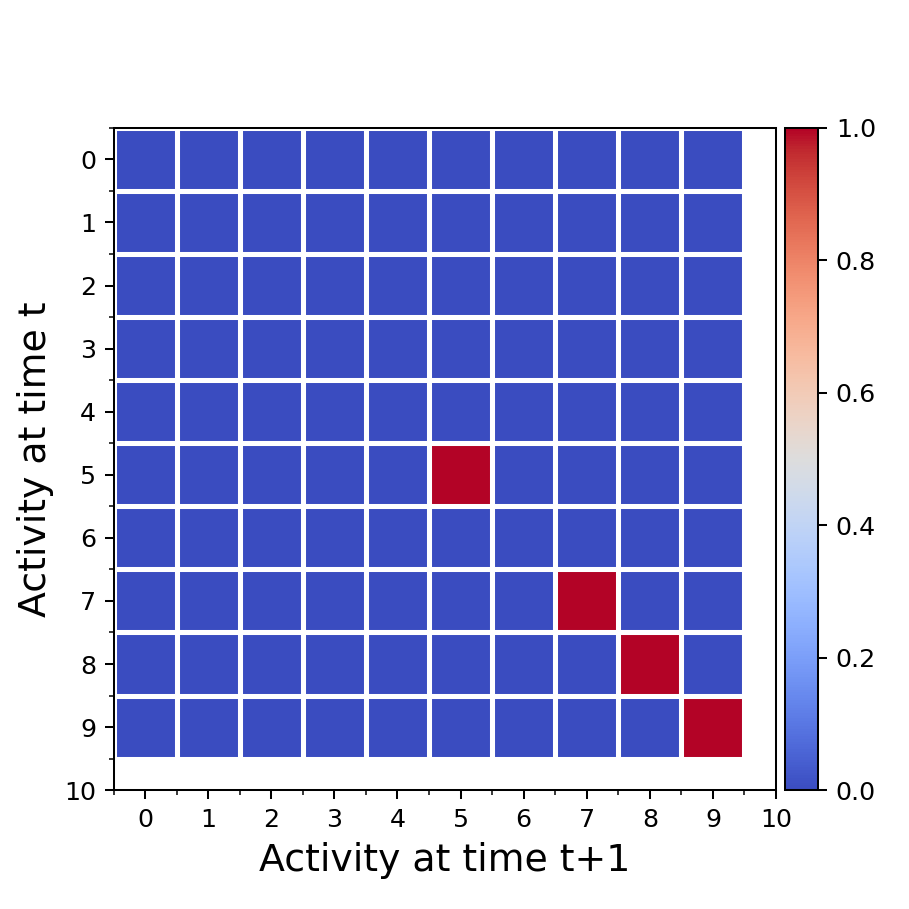

In [21]:
###### Plotting transition matrix ########

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
im = ax.imshow(transition_matrices[0], interpolation='none', vmin=0, vmax=1, aspect='equal', cmap='coolwarm');
#fig.colorbar(im)
ax = plt.gca();
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 11, 1));
ax.set_yticks(np.arange(0, 11, 1));

# Labels for major ticks
ax.set_xticklabels(np.arange(0, 11, 1));
ax.set_yticklabels(np.arange(0, 11, 1));

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
ax.grid(False)
# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

#Title
#ax.set_title("State transition matrix TV Plasma single day", y=1.03, fontsize = 15)

#Axes labels
ax.set_xlabel('Activity at time t+1', fontsize = 15)
ax.set_ylabel('Activity at time t', fontsize=15)

#Color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
#plt.show()
#plt.savefig('Activity Transition matrix.pdf')
#plt.show()

def animate(i):
    im.set_data(transition_matrices[i])
    return im
anim = FuncAnimation(fig, animate, frames=nt, interval=500)
plt.show()